In [5]:
# import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
# import random

# from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
# import torch 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.interpolate import CubicSpline, UnivariateSpline

# import pysindy as ps

## Высокий полином МНК

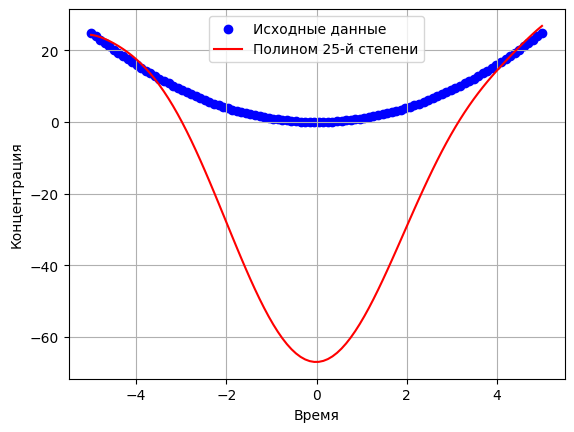

Коэффициенты полинома: [-6.70550021e+01  2.19299905e-01  1.20883325e+01 -1.63655074e-01
 -6.92862237e-01  9.18789838e-03  1.95919685e-02 -2.79931478e-04
 -1.73287738e-04  3.99145912e-05 -4.25890837e-06 -3.06889940e-06
  4.89788748e-07  1.24850474e-07 -4.80643911e-08 -3.85729817e-09
  2.87137183e-09  1.09003692e-10 -1.03311621e-10 -2.32677088e-12
  2.23317198e-12  2.83052495e-14 -2.74579413e-14 -6.32933864e-17
  1.49280957e-16 -1.87663733e-18]


In [6]:
# Данные: время (t) и концентрация (C)
t = np.linspace(-5, 5, 100)
C = np.array([i**2 for i in t])

# Выбираем степень полинома
degree = 25 # Например, квадратичная зависимость

# Формируем матрицу признаков для полиномиальной регрессии
X = np.vstack([t**i for i in range(degree + 1)]).T

# Вычисляем коэффициенты МНК
theta = np.linalg.inv(X.T @ X) @ X.T @ C

# Предсказание значений
# t_pred = np.linspace(min(t), max(t), 100)  # Генерируем новые точки для гладкости графика
t_pred = t
X_pred = np.vstack([t_pred**i for i in range(degree + 1)]).T
C_pred = X_pred @ theta

# Визуализация
plt.scatter(t, C, label="Исходные данные", color="blue")
plt.plot(t_pred, C_pred, label=f"Полином {degree}-й степени", color="red")
plt.xlabel("Время")
plt.ylabel("Концентрация")
plt.legend()
plt.grid()
plt.show()

# Вывод коэффициентов полинома 
print(f"Коэффициенты полинома: {theta}")


# Проверка Метода конечных разностей

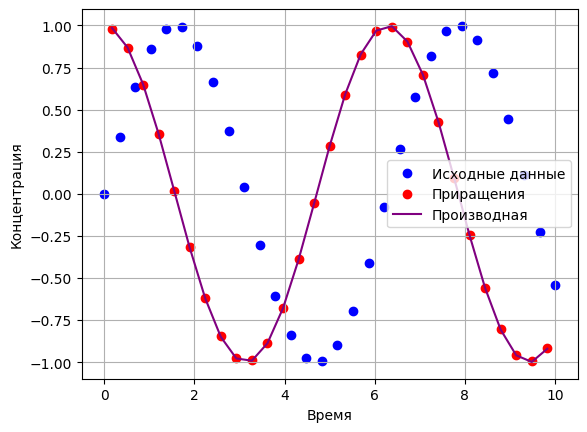

In [7]:
t = np.linspace(0, 10, 30)  # Временные точки
f = np.sin(t)  # Пример функции

h = t[1] - t[0]  # Шаг по времени
df_dt = np.diff(f) / h  # Приращения (разностная производная)

# df_dt получается длины 29, если нужно подстроить размерность:
t_mid = (t[:-1] + t[1:]) / 2  # Средние точки

# Производная
df = np.cos(t_mid)

# Визуализация
plt.scatter(t, f, label="Исходные данные", color="blue")
plt.scatter(t_mid, df_dt, label="Приращения", color="red")
plt.plot(t_mid, df, label="Производная", color="purple")
plt.xlabel("Время")
plt.ylabel("Концентрация")
plt.legend()
plt.grid()
plt.show()

# Нелинейная регрессия

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

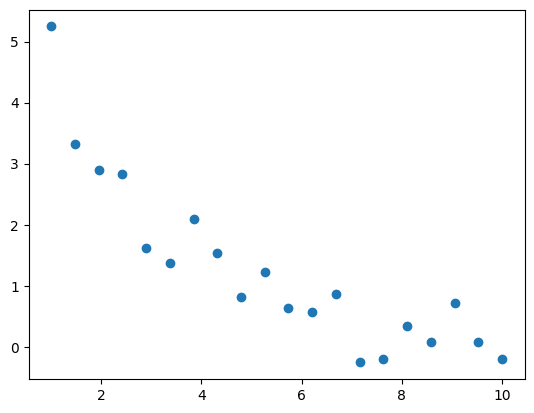

In [8]:
def model(x, a):
    return a / x

np.random.seed(42)
x = np.linspace(1, 10, 20)  # Значения x (не нулевые)
a_true = 5
y = model(x, a_true) + np.random.normal(0, 0.5, size=len(x))  # Добавляем шум

popt, pcov = curve_fit(model, x, y)
a_fit = popt[0]

x_fit = np.linspace(1, 10, 100)
y_fit = model(x_fit, a_fit)

plt.scatter(x, y, label="Данные")
plt.plot


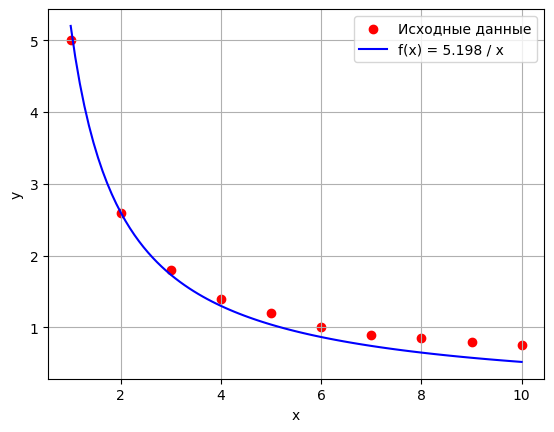

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Загружаем данные (замени на свои массивы)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Независимая переменная
y = np.array([5, 2.6, 1.8, 1.4, 1.2, 1.0, 0.9, 0.85, 0.8, 0.75])  # Наблюдения

# Определяем модель 1/x
def model(x, a):
    return a / x

# Подгоняем модель
popt, _ = curve_fit(model, x, y)
a_fit = popt[0]

# Генерируем предсказания
x_fit = np.linspace(min(x), max(x), 100)
y_fit = model(x_fit, a_fit)

# Визуализируем
plt.scatter(x, y, label="Исходные данные", color="red")
plt.plot(x_fit, y_fit, label=f"f(x) = {a_fit:.3f} / x", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


# Сплайны

R^2 для интерполяции: 1.0000
R^2 для сглаживания: 0.9955


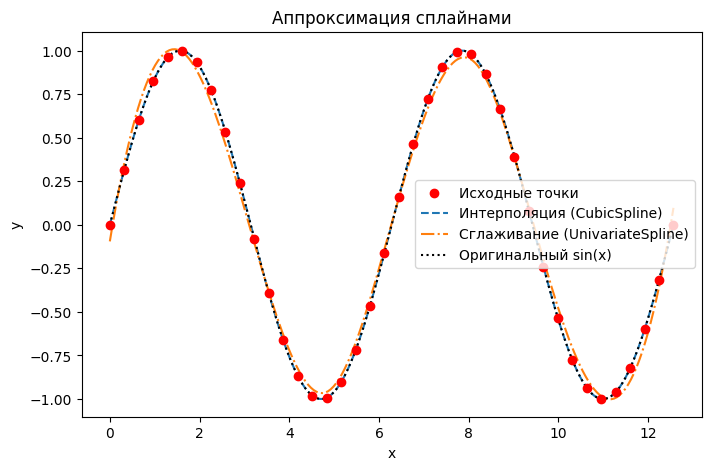

Квадраты остатков сглаживания: 0.1000


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, UnivariateSpline
from sklearn.metrics import r2_score

# Генерируем данные
np.random.seed(41)  # Для воспроизводимости
x = np.linspace(0, 4*np.pi, 40)  # 10 точек на интервале [0, 2*pi]
# y = np.sin(x) + np.random.normal(0, 0.1, len(x))  # Добавляем шум
y = np.sin(x)

# Создаем плотную сетку для отображения сплайна
x_dense = np.linspace(0, 4 * np.pi, 200)
y_true = np.sin(x_dense)  # Истинные значения синуса

# Интерполяция кубическим сплайном
cs = CubicSpline(x, y)
y_interp = cs(x_dense)

# Аппроксимация сглаживающим сплайном (s регулирует степень сглаживания)
us = UnivariateSpline(x, y, s=0.1)
y_smooth = us(x_dense)

# Вычисление R^2
r2_interp = r2_score(y_true, y_interp)
r2_smooth = r2_score(y_true, y_smooth)
print(f'R^2 для интерполяции: {r2_interp:.4f}')
print(f'R^2 для сглаживания: {r2_smooth:.4f}')

# Визуализация
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Исходные точки', color='red', zorder=3)
plt.plot(x_dense, y_interp, label='Интерполяция (CubicSpline)', linestyle='--')
plt.plot(x_dense, y_smooth, label='Сглаживание (UnivariateSpline)', linestyle='-.')
plt.plot(x_dense, y_true, label='Оригинальный sin(x)', linestyle='dotted', color='black')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация сплайнами')
plt.show()

print(f'Квадраты остатков сглаживания: {us.get_residual():.4f}')

In [52]:
print(len(x_dense))
print(x_dense)

200
[ 0.          0.06314759  0.12629518  0.18944277  0.25259036  0.31573796
  0.37888555  0.44203314  0.50518073  0.56832832  0.63147591  0.6946235
  0.75777109  0.82091868  0.88406627  0.94721387  1.01036146  1.07350905
  1.13665664  1.19980423  1.26295182  1.32609941  1.389247    1.45239459
  1.51554218  1.57868978  1.64183737  1.70498496  1.76813255  1.83128014
  1.89442773  1.95757532  2.02072291  2.0838705   2.14701809  2.21016569
  2.27331328  2.33646087  2.39960846  2.46275605  2.52590364  2.58905123
  2.65219882  2.71534641  2.77849401  2.8416416   2.90478919  2.96793678
  3.03108437  3.09423196  3.15737955  3.22052714  3.28367473  3.34682232
  3.40996992  3.47311751  3.5362651   3.59941269  3.66256028  3.72570787
  3.78885546  3.85200305  3.91515064  3.97829823  4.04144583  4.10459342
  4.16774101  4.2308886   4.29403619  4.35718378  4.42033137  4.48347896
  4.54662655  4.60977414  4.67292174  4.73606933  4.79921692  4.86236451
  4.9255121   4.98865969  5.05180728  5.11495487

In [49]:
us.derivative().roots()

array([ 1.50709209,  4.62537041,  7.87720282, 11.12450067])